# Линеаризация обратной связью


## Пример. Обращенный маятник на тележке

Кинетическая энергия
$$T = \frac{m}{2}\left[(l\dot{\alpha}\cos{\alpha}+ \dot{s})^2 + (l\dot{\alpha}\in{\alpha})^2\right] + \frac{M}{2}\dot{s}^2$$

Потенциальная энергия
$$\Pi = mgl\cos{\alpha}$$


Уравнения Лагранжа
$$\frac{d}{dt}\frac{\partial L(q, \dot{q}, t)}{\partial \dot{q}} - \frac{\partial L(q, \dot{q}, t)}{\partial q} = 0, \quad L(q, \dot{q}, t) = T - \Pi$$

для обращенного маятника на тележке:
$$\left\{ 
\begin{array}\\
ml^2\ddot{\alpha} + ml\ddot{s}\cos{\alpha} - mgl\sin{\alpha} = 0 \\
ml\ddot{\alpha}\cos{\alpha} + (m + M)\ddot{s} - ml^2\dot{\alpha}^2\sin{\alpha} = u
\end{array}
\right. 
$$

В нормальной форме Коши те же уравнения:
$$\left\{ 
\begin{array}\\
\dot{\alpha} = \omega \\
\dot{\omega} = \frac{1}{(M+m\sin{\alpha}^2)l} \left[(M+m)g\sin{\alpha} - ml\omega^2\sin{\alpha}\cos{\alpha}-u\cos{\alpha}\right] \\
\dot{s} = v \\
\dot{v} = \frac{1}{(M+m\sin{\alpha}^2)} \left[-mg\sin{\alpha}\cos{\alpha} + ml\omega^2\sin{\alpha} + u\right]
\end{array}
\right. 
$$

Таким образом, система может быть записана в форме
$$\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x}) + \mathbf{g}(\mathbf{x}) \cdot \mathbf{u},$$

где
$$\mathbf{f}(\mathbf{x}) = 
\left(
\begin{array}\\
\omega\\
\frac{(M+m)g\sin{\alpha} - ml\omega^2\sin{\alpha}\cos{\alpha}}{(M+m\sin{\alpha}^2)l}\\
v\\
\frac{-mg\sin{\alpha}\cos{\alpha} + ml\omega^2\sin{\alpha}}{(M+m\sin{\alpha}^2)}
\end{array}\right), \quad
\mathbf{g}(\mathbf{x}) = 
\left(
\begin{array}\\
0\\
\frac{-\cos{\alpha}}{(M+m\sin{\alpha}^2)l}\\
0\\
\frac{1}{(M+m\sin{\alpha}^2)}
\end{array}
\right), \quad
\mathbf{x}=
\left(
\begin{array}\\
\alpha\\
\omega\\
s\\
v
\end{array}
\right).$$

Цель управления - стабилизация углового положения в нуле:
$$y = \alpha, \quad h(x) = \alpha \rightarrow 0$$

Последовательно вычисляя производные $h(x)$ в силу системы, получим, что относительная степень управляемой системы $r=2$
$$L_g L_f^{r-1}h(x)=-\frac{\cos{\alpha}}{(M + m\sin{\alpha}^2)l}$$

Тогда управление
$$u(x) = -\frac{L^2_f h(x) + k_1 L^1_f h(x) + k_0 h(x)}{L_g L_f^{r-1}h(x)}=\frac{(M+m)g\sin{\alpha}-ml\omega^2\sin{\alpha}\cos{\alpha} + l(M + m\sin{\alpha}^2)(k_1\omega+k_0\alpha)}{\cos{\alpha}},$$

где коэффициенты $k_1$ и $k_0$ таковы, что нулевое решение системы дифференциальных уравнений
$$\ddot{\alpha} + k_1\dot{\alpha} + k_0\alpha = 0$$
асимптотически устойчиво.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp 

In [25]:
def control(x, p):
    cosA = np.cos(x[0])
    sinA = np.sin(x[0])
    
    a = 1
    k1 = a**2
    k0 = 2 * a;
    
    u = ((p.M + p.m) * p.g * sinA - p.m *p.l * x[1]**2 * sinA * cosA + p.l * (p.M + p.m * sinA**2) * (k1 * x[1] + k0 * x[0])) / np.cos(x[0])
    return u

def rhs(t, x, p):
    
    u = control(x, p)        
    
    cosA = np.cos(x[0])
    sinA = np.sin(x[0])
    
    x_dot = np.zeros(4)

    x_dot[0] = x[1]
    x_dot[1] = ( (p.M + p.m) * p.g * sinA - p.m *p.l * x[1]**2 * sinA * cosA - u * cosA ) / (p.M + p.m * sinA**2) / p.l
    x_dot[2] = x[3]
    x_dot[3]=  ( -p.m * p.g * sinA * cosA + p.m * p.l * x[1]**2 * sinA + u ) / (p.M + p.m * sinA**2) / p.l
        
    return x_dot

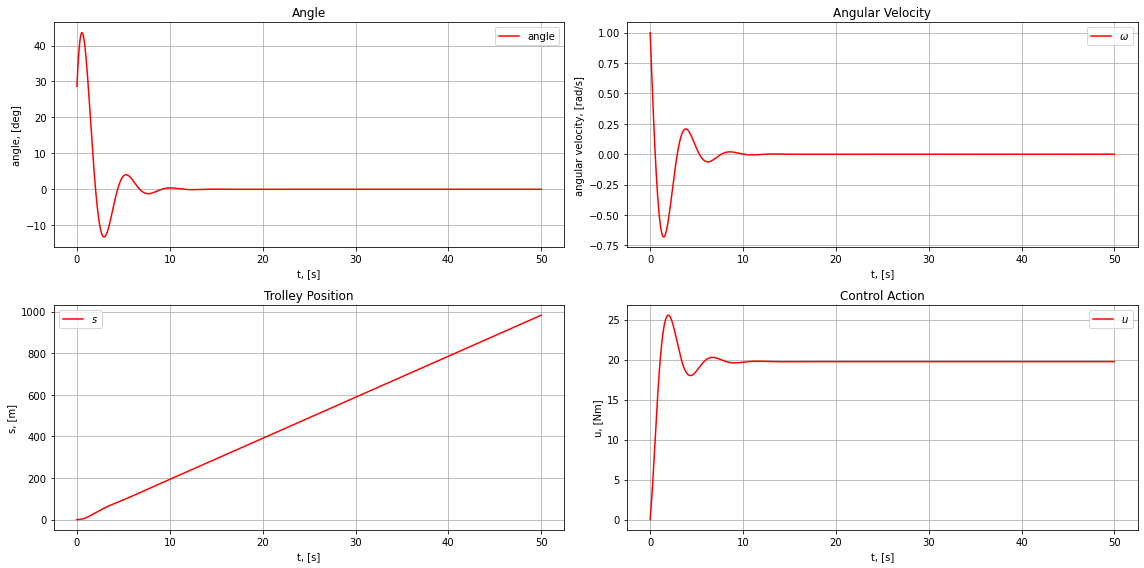

In [29]:
class Parameters(object):
    pass

param = Parameters()
param.M = 1
param.m = 0.5
param.g = 10
param.l = 0.5

x_0 = np.array([0.5, 1., 0., 0.])

t0 = 0.
tf = 50.
t_eval = np.arange(t0, tf, 0.01)

sol = solve_ivp(lambda t, x: rhs(t, x, param), (t0, tf), x_0, t_eval = t_eval)
x = sol.y.T
t = sol.t

u = np.zeros((np.size(t), 1))
for i in range(np.size(t)):
    u[i] = control(x[i, :], param)

   
fig1 = plt.figure(figsize=(16,8))
ax1 = fig1.add_subplot(2,2,1)

ax1.set_title("Angle")
ax1.plot(t, x[:, 0] * 180. / np.pi, label = 'angle', color = 'red')
ax1.set_ylabel(r'angle, [deg]')
ax1.set_xlabel(r't, [s]')
ax1.grid(True)
ax1.legend()

ax2 = fig1.add_subplot(2,2,2)

ax2.set_title("Angular Velocity")
ax2.plot(t, x[:,1], label = '$\omega$', color = 'red')
ax2.set_ylabel(r'angular velocity, [rad/s]')
ax2.set_xlabel(r't, [s]')
ax2.grid(True)
ax2.legend()

ax3 = fig1.add_subplot(2,2,3)

ax3.set_title("Trolley Position")
ax3.plot(t, x[:,2], label = '$s$', color = 'red')
ax3.set_ylabel(r's, [m]')
ax3.set_xlabel(r't, [s]')
ax3.grid(True)
ax3.legend()

ax4 = fig1.add_subplot(2,2,4)

ax4.set_title("Control Action")
ax4.plot(t, x[:,3], label = '$u$', color = 'red')
ax4.set_ylabel(r'u, [Nm]')
ax4.set_xlabel(r't, [s]')
ax4.grid(True)
ax4.legend()

plt.tight_layout()

## Возможные задачи

1. Преписать пример выше на sympy. Вход - кинетическая и потенциальная энергии, значения параметров, начальные условия и цель управления.


2. Input-Output Feedback Linearization for the Control of a 4 Cable-Driven Parallel Robot
https://hal.archives-ouvertes.fr/hal-03229586/document


3. Input output feedback linearization control and variable step size MPPT algorithm of a grid-connected photovoltaic inverter
https://doi.org/10.1016/j.renene.2011.04.027


4. Feedback Linearization Control of the Inertia Wheel Pendulum
https://sciendo.com/pdf/10.2478/cait-2014-0036


5. Feedback linearization control of systems with singularities: a ball-beam revisit
http://control.dei.unipd.it/public/Schenato/TESI/Tosin_2009/materiale/Feedback%20linearization%20control.PDF


6. Robust feedback linearization for nonlinear processes control (пример с манипулятором)
https://doi.org/10.1016/j.isatra.2018.01.017